In [5]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Conv1D, MaxPooling1D
from gensim.models import Word2Vec
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/train.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/test.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('/content/drive/MyDrive/Datasets/val.txt', names=['Text', 'Emotion'], sep=';')

In [ ]:
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [1]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [7]:
emotions_list = df_train['Emotion'].unique()
emotions_list

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

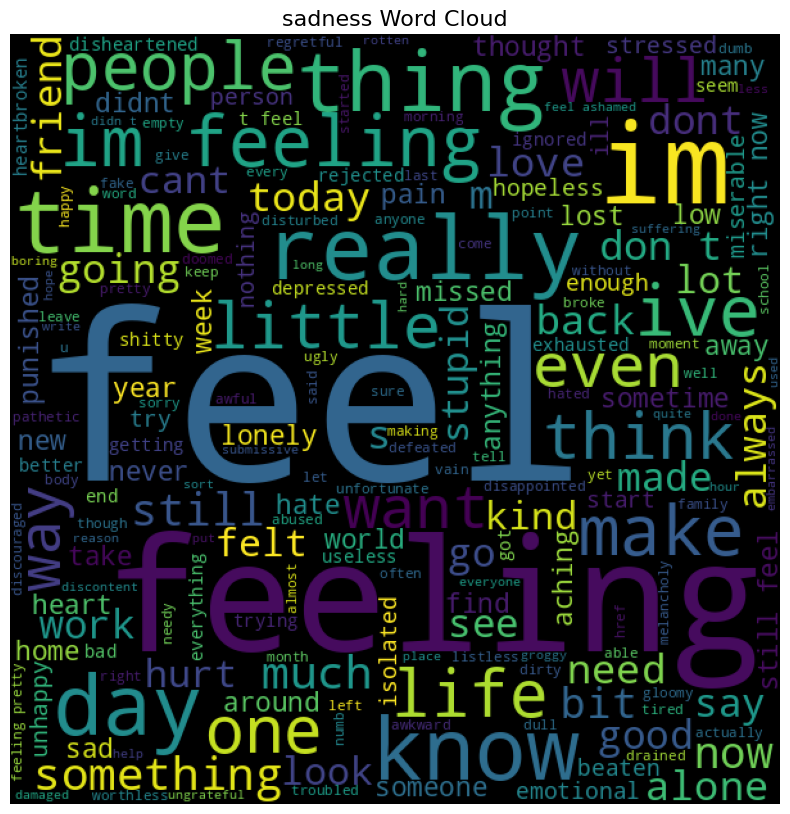

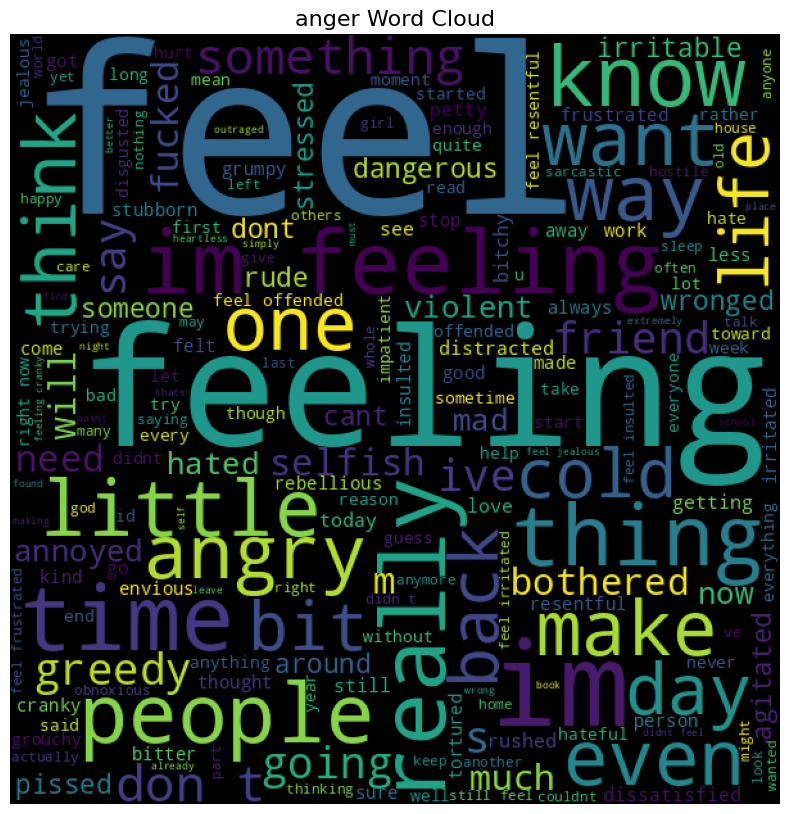

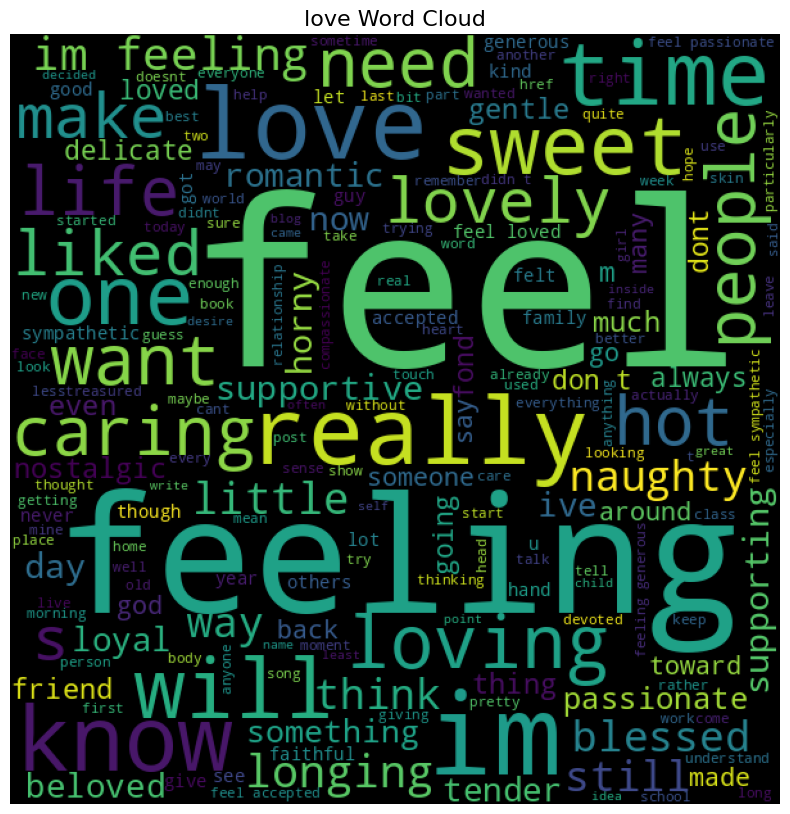

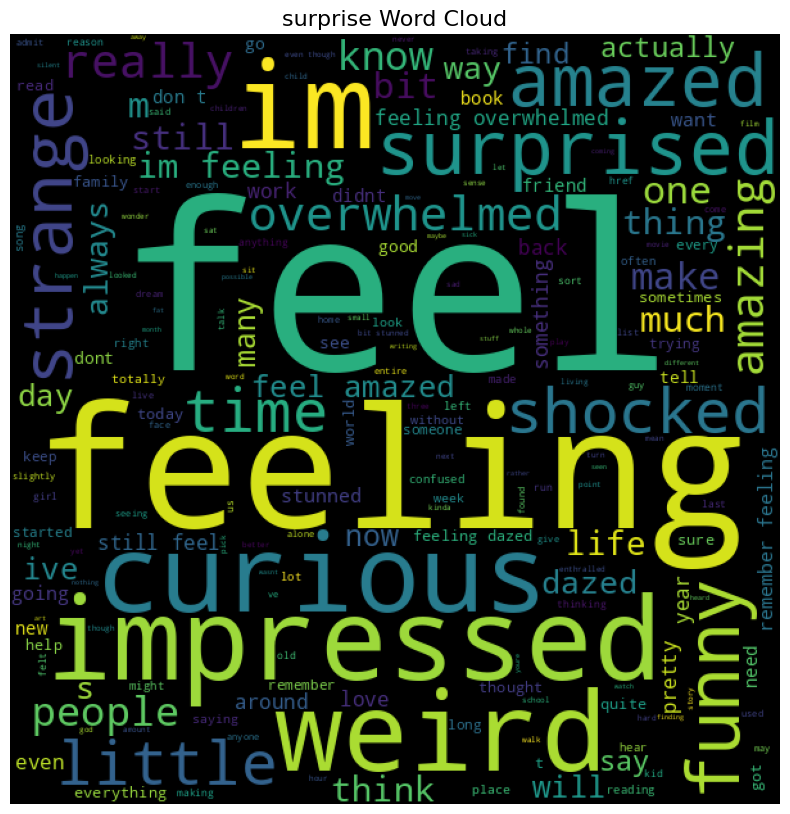

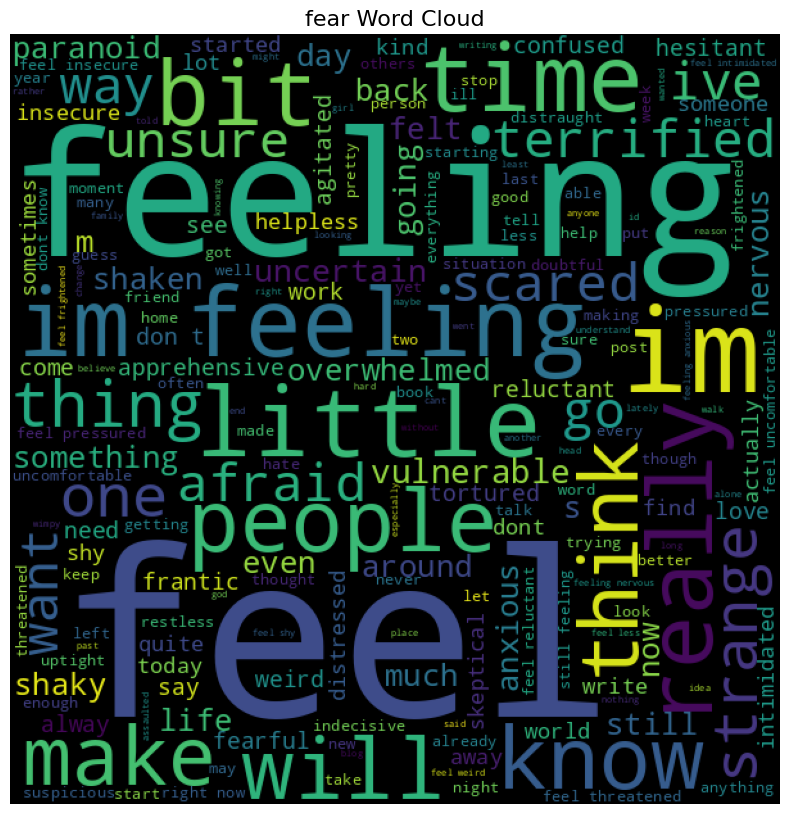

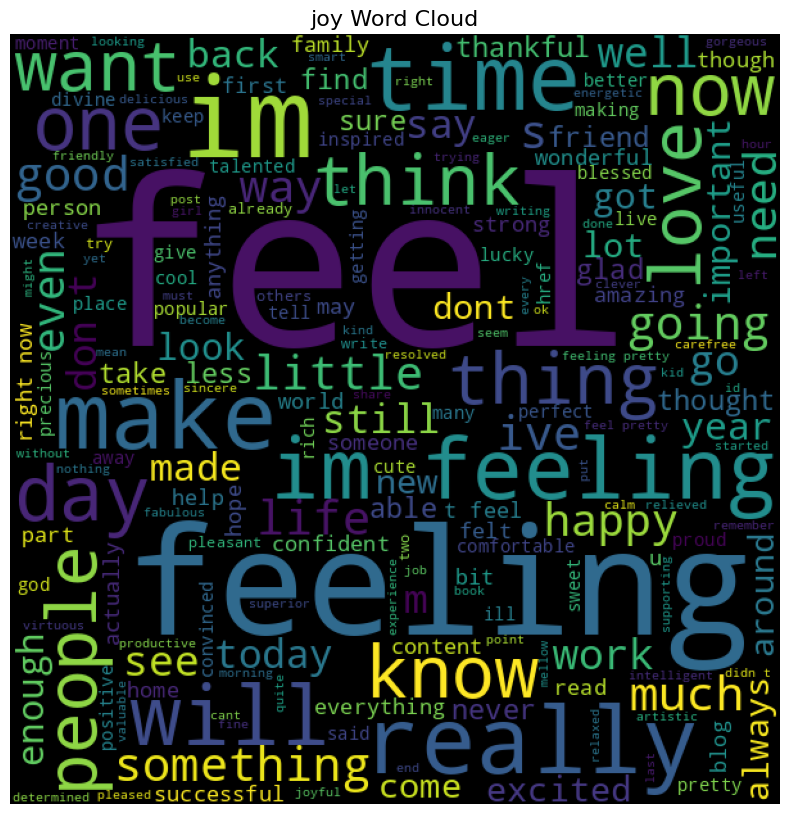

In [8]:
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in df_train.loc[df_train['Emotion'] == emotion,'Text']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

In [ ]:
# Text preprocessing function

str_punc = string.punctuation.replace(',', '').replace("'",'')

def clean(text):
    global str_punc
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    return text

In [ ]:
#df_test = df_test[df_test['Emotion'].isin(['sadness','anger','joy','fear','surprise','love'])]
#df_val = df_val[df_val['Emotion'].isin(['sadness','anger','joy','fear','surprise','love'])]
#df_train = df_train[df_train['Emotion'].isin(['sadness','anger','joy','fear','surprise','love'])]
df_test = df_test[df_test['Emotion'].isin(['sadness','anger','joy','fear','surprise','love'])]
df_val = df_val[df_val['Emotion'].isin(['sadness','anger','joy','fear','surprise','love'])]
df_train = df_train[df_train['Emotion'].isin(['sadness','anger','joy','fear','surprise','love'])]


X_train = df_train['Text'].apply(clean)
#X_train = text_cleaning(df_train,"Text")
y_train = df_train['Emotion']

X_test = df_test['Text'].apply(clean)
#X_test = text_cleaning(df_test,"Text")
y_test = df_test['Emotion']

X_val = df_val['Text'].apply(clean)
#X_val = text_cleaning(df_val,"Text")
y_val = df_val['Emotion']

In [ ]:
X_train.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: Text, dtype: object

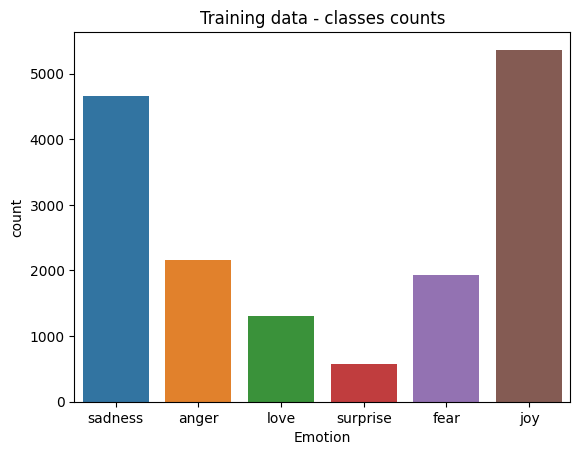

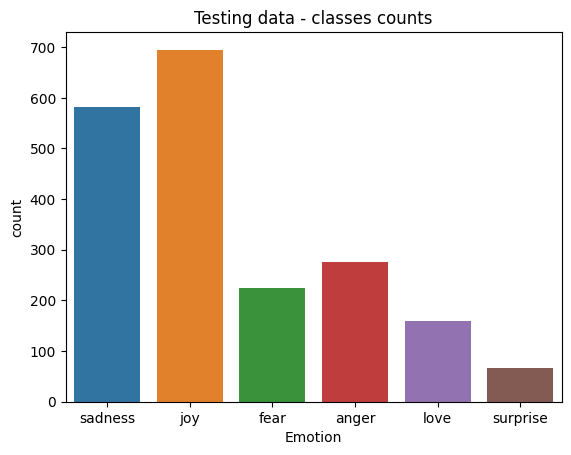

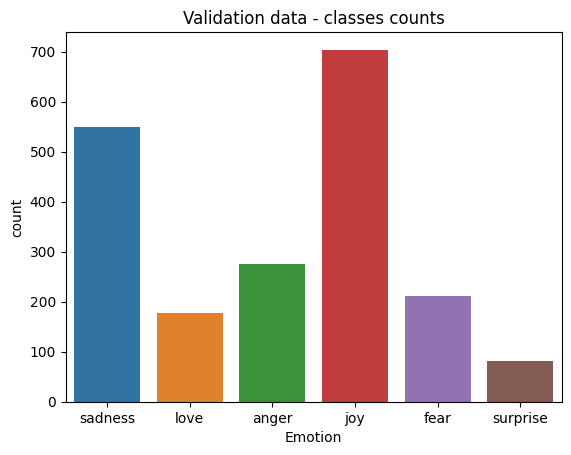

In [ ]:
# Visualize classes counts

sns.countplot(x=y_train)
plt.title("Training data - classes counts")
plt.show()

sns.countplot(x=y_test)
plt.title("Testing data - classes counts")
plt.show()

sns.countplot(x=y_val)
plt.title("Validation data - classes counts")
plt.show()

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [ ]:
y_train

array([4, 4, 0, ..., 4, 2, 2])

In [ ]:
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
tokenizer = Tokenizer(num_words=10000, lower=True)
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))
#tokenizer.fit_on_texts(pd.concat([df_train['Text'], df_test.Text], axis=0))

print(tokenizer.word_index)

{'i': 1, 'feel': 2, 'and': 3, 'to': 4, 'the': 5, 'a': 6, 'feeling': 7, 'that': 8, 'of': 9, 'my': 10, 'in': 11, 'it': 12, 'like': 13, 'so': 14, 'im': 15, 'for': 16, 'me': 17, 'have': 18, 'but': 19, 'was': 20, 'is': 21, 'this': 22, 'am': 23, 'with': 24, 'not': 25, 'about': 26, 'be': 27, 'as': 28, 'on': 29, 'you': 30, 'just': 31, 'at': 32, 'when': 33, 'or': 34, 'all': 35, 'because': 36, 'more': 37, 'do': 38, 'can': 39, 'really': 40, 'up': 41, 'by': 42, 'are': 43, 'very': 44, 't': 45, 'been': 46, 'know': 47, 'if': 48, 'out': 49, 'myself': 50, 'time': 51, 'what': 52, 'how': 53, 'get': 54, 'little': 55, 'had': 56, 'now': 57, 'will': 58, 'from': 59, 'they': 60, 'being': 61, 'people': 62, 'he': 63, 'them': 64, 'would': 65, 'want': 66, 'her': 67, 'some': 68, 'one': 69, 'still': 70, 'think': 71, 'ive': 72, 'who': 73, 'even': 74, 'him': 75, 'an': 76, 'life': 77, 'its': 78, 'there': 79, 'make': 80, 'bit': 81, 'we': 82, 'something': 83, 'love': 84, 'much': 85, 'going': 86, 'things': 87, 'dont': 88,

In [ ]:
X_train.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: Text, dtype: object

In [ ]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
for i in range(3):
    print(X_train[i] ,'\n',sequences_train[i])

i didnt feel humiliated 
 [1, 138, 2, 642]
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake 
 [1, 39, 100, 59, 7, 14, 532, 4, 14, 3764, 548, 31, 59, 61, 128, 146, 73, 1592, 3, 21, 1343]
im grabbing a minute to post i feel greedy wrong 
 [15, 2945, 6, 1171, 4, 289, 1, 2, 462, 414]


In [ ]:

X_train = pad_sequences(sequences_train, maxlen=256, truncating='pre') # truncating='pre' => remove post padding extra than maxlen
X_test = pad_sequences(sequences_test, maxlen=256, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=256, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 16187


In [ ]:
### Word Embeddings
#pip install gensim
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-300') #300 dimension

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:

vector_size = 300
num_words = vocabSize
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero
        if word in glove_gensim.key_to_index:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(vector_size)



In [ ]:
# Embedding Layer
max_features = vocabSize    # number of unique words in the vocabulary
maxlen = X_train.shape[1]   # length of each sequence or padding size
embedding_size = 300    # uses 300 length vectors to represent each word

# Convolution Layer
kernel_size = 3 # Kernel of size 5*5 matrix
filters = 64 # number of convolutional filters to use

#Max Pooling Layer
pool_size = 2 # size of the max pooling area

# LSTM Layer
lstm_output_size = 128

# Training
# batch_size = 30
# epochs = 2

In [ ]:
# Embedding Layer
#max_features = vocabSize    # number of unique words in the vocabulary
#maxlen = X_train.shape[1]   # length of each sequence or padding size
#embedding_size = 300    # uses 300 length vectors to represent each word

# Convolution Layer
#kernel_size = 3 # Kernel of size 5*5 matrix
#filters = 32 # number of convolutional filters to use

#Max Pooling Layer
#pool_size = 2 # size of the max pooling area

# LSTM Layer
#lstm_output_size = 32

# Training
# batch_size = 30
# epochs = 2

In [ ]:
print('Build model...')

model = Sequential()
model.add(Embedding(vocabSize, embedding_size, input_length=maxlen, weights = [gensim_weight_matrix],trainable = False)) # 1st Layer - Embedding
model.add(Dropout(0.25))                                             # 2nd Layer - Dropout
model.add(LSTM(256))
#model.add(Conv1D(filters, kernel_size,padding='valid', activation='relu', strides=1)) #3rd Layer Conv1d
#model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.25))
#model.add(MaxPooling1D(pool_size=pool_size))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6))                                                  # 6th Layer - Dense
model.add(Activation('softmax'))                                     # 7th Layer - Activation


model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 300)          4856100   
                                                                 
 dropout (Dropout)           (None, 256, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 256)               570368    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)   

In [ ]:
adam = Adam(learning_rate=0.0005)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    mode = 'min',
    patience=9,
    restore_best_weights=True,
)

In [ ]:
#Dumping The Model ===========================================PENDING
from keras.callbacks import ModelCheckpoint
model_file_name = 'model_emotion.h5'
best_model = ModelCheckpoint('best model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=32,
                    epochs=70,
                    callbacks=[callback,best_model]
                   )

Epoch 1/70
498/501 [============================>.] - ETA: 0s - loss: 0.1090 - accuracy: 0.4926
Epoch 1: val_accuracy improved from -inf to 0.68650, saving model to best model.h5
501/501 [==============================] - 19s 19ms/step - loss: 0.1089 - accuracy: 0.4933 - val_loss: 0.0760 - val_accuracy: 0.6865
Epoch 2/70
  7/501 [..............................] - ETA: 8s - loss: 0.0898 - accuracy: 0.5982

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


498/501 [============================>.] - ETA: 0s - loss: 0.0659 - accuracy: 0.7312
Epoch 2: val_accuracy improved from 0.68650 to 0.79900, saving model to best model.h5
501/501 [==============================] - 9s 19ms/step - loss: 0.0659 - accuracy: 0.7314 - val_loss: 0.0479 - val_accuracy: 0.7990
Epoch 3/70
499/501 [============================>.] - ETA: 0s - loss: 0.0481 - accuracy: 0.8067
Epoch 3: val_accuracy improved from 0.79900 to 0.85550, saving model to best model.h5
501/501 [==============================] - 9s 18ms/step - loss: 0.0481 - accuracy: 0.8067 - val_loss: 0.0354 - val_accuracy: 0.8555
Epoch 4/70
499/501 [============================>.] - ETA: 0s - loss: 0.0376 - accuracy: 0.8519
Epoch 4: val_accuracy improved from 0.85550 to 0.88750, saving model to best model.h5
501/501 [==============================] - 9s 19ms/step - loss: 0.0376 - accuracy: 0.8518 - val_loss: 0.0277 - val_accuracy: 0.8875
Epoch 5/70
500/501 [============================>.] - ETA: 0s - loss:

In [ ]:
print(model)

In [ ]:
layer_outputs = [layer.output for layer in model.layers]

In [ ]:
layer_outputs

[<KerasTensor: shape=(None, 256, 300) dtype=float32 (created by layer 'embedding')>,
 <KerasTensor: shape=(None, 256, 300) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dropout_1')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dropout_2')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'dense_1')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'activation')>]

In [ ]:
model.save('Emotion Detection.h5')
#from keras.models import Model
#activation_model = Model(inputs=model.input, outputs=layer_outputs)
#activations = activation_model.predict(predict("I am enjoying life"))
#layer0 = activations[0]


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Final Accuracy : %.2f%%" %(scores[1]*100))
#print("Final Loss : %.2f%%" % (scores[0]*100))

63/63 [==============================] - 1s 10ms/step - loss: 0.0181 - accuracy: 0.9255
Final Accuracy : 92.55%


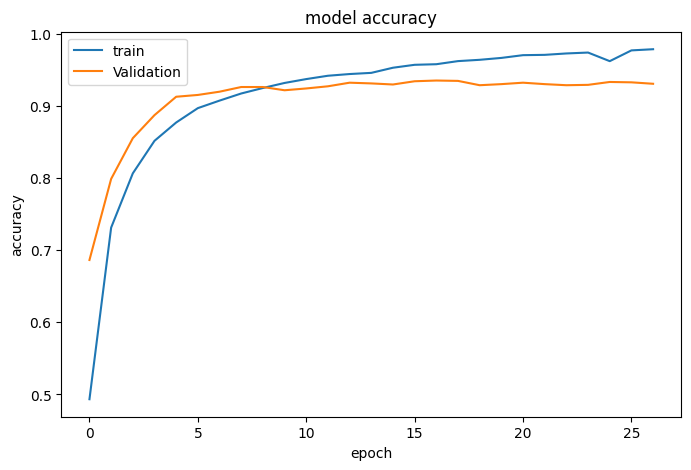

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

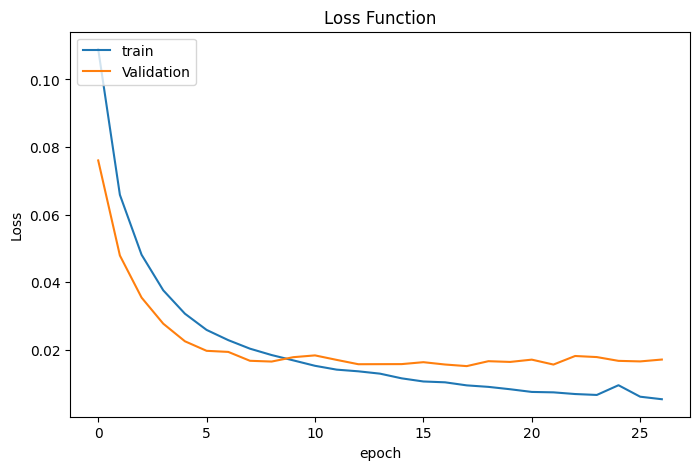

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(X_test), axis =1)
y_true = np.argmax(y_test, axis = 1)
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

63/63 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       270
           1       0.88      0.90      0.89       218
           2       0.92      0.96      0.94       663
           3       0.91      0.77      0.84       188
           4       0.97      0.96      0.96       590
           5       0.79      0.73      0.76        71

    accuracy                           0.93      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.93      0.93      0.92      2000



In [ ]:
# Classify custom sample
def predict(sentence,modelxx):
    # print(sentence)
    sentence = clean(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=256, truncating='pre')
    result = le.inverse_transform(np.argmax(modelxx.predict(sentence), axis=-1))[0]
    proba =  np.max(modelxx.predict(sentence))
    print(f"{result} : {proba}\n\n")

In [ ]:
from keras.models import load_model

model2 = load_model('Emotion Detection.h5')
predict('i feel like a miserable piece of garbage',model2)

1/1 [==============================] - 0s 27ms/step
sadness : 0.9989039897918701




In [ ]:
predict('my brother is dead', model2)

1/1 [==============================] - 0s 18ms/step
fear : 0.46018269658088684


